## Neighborhood/Global Distances

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

FIt-SNE repository not detected. Functionality will be disabled.


In [2]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1326, 500)

In [4]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1117, 500)

In [5]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}}}

---

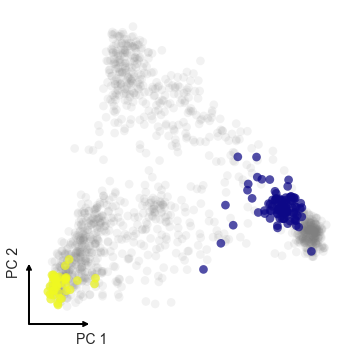

In [6]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['8','4']) # retinal ganglia and cones

In [7]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform='arcsinh'), post=retina_PCA2.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'] = corr_stats[0], EMD, KLD

R: 0.3078
EMD: 0.1796
KLD: 0.0474
CPU times: user 26.7 ms, sys: 3.37 ms, total: 30.1 ms
Wall time: 29 ms


CPU times: user 18 s, sys: 452 ms, total: 18.5 s
Wall time: 18.1 s


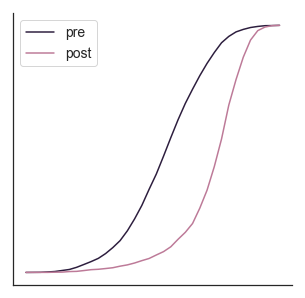

<Figure size 504x504 with 0 Axes>

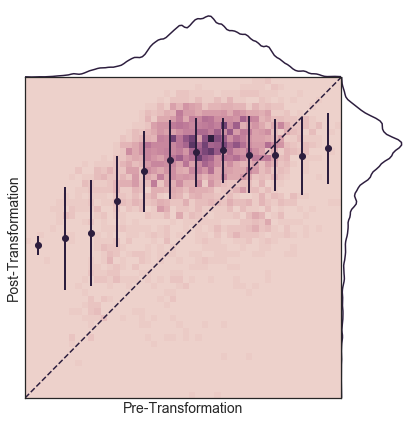

In [8]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [9]:
retina_PCA10 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=10)

In [10]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform='arcsinh'), post=retina_PCA10.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (10)'], final_distance_stats['Retina']['EMD']['PCA (10)'], final_distance_stats['Retina']['KLD']['PCA (10)'] = corr_stats[0], EMD, KLD

R: 0.4837
EMD: 0.1843
KLD: 0.0338
CPU times: user 24.9 ms, sys: 4.17 ms, total: 29 ms
Wall time: 33.5 ms


CPU times: user 18 s, sys: 489 ms, total: 18.5 s
Wall time: 18 s


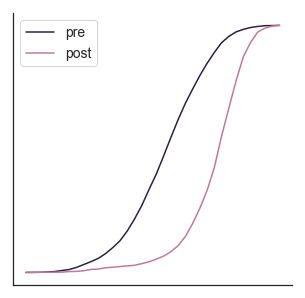

<Figure size 504x504 with 0 Axes>

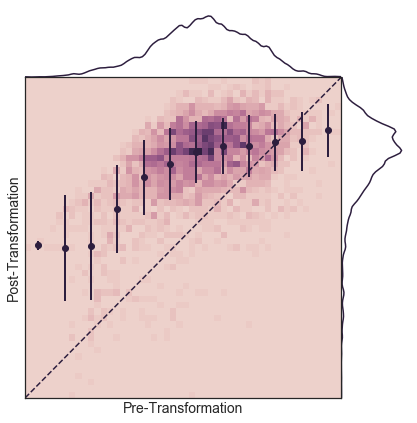

In [11]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

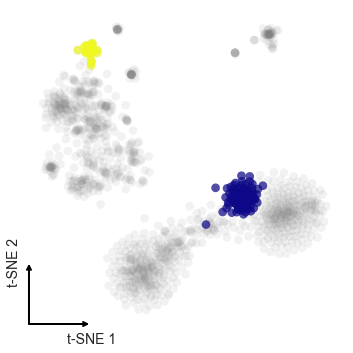

In [12]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_tSNE.plot_barcodes(ranks=['8','4']) 

In [13]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform='arcsinh'), post=retina_tSNE.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'] = corr_stats[0], EMD, KLD

R: 0.3591
EMD: 0.0221
KLD: 0.0526
CPU times: user 43.5 ms, sys: 7.49 ms, total: 51 ms
Wall time: 32.2 ms


CPU times: user 18.1 s, sys: 431 ms, total: 18.5 s
Wall time: 18 s


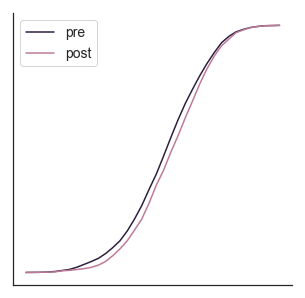

<Figure size 504x504 with 0 Axes>

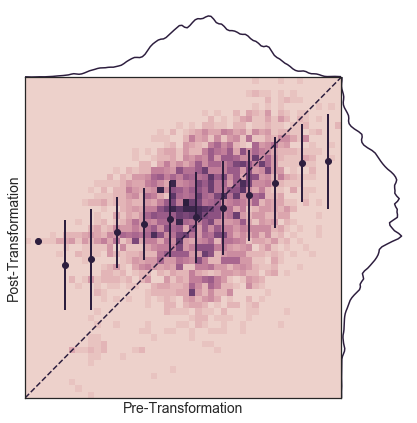

In [14]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

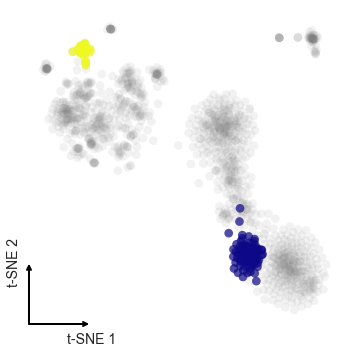

In [15]:
retina_FItSNE = DR.from_file('pymethods_out/retina_FItSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_FItSNE.plot_barcodes(ranks=['8','4']) 

In [16]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform='arcsinh'), post=retina_FItSNE.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['FIt-SNE'], final_distance_stats['Retina']['EMD']['FIt-SNE'], final_distance_stats['Retina']['KLD']['FIt-SNE'] = corr_stats[0], EMD, KLD

R: 0.6244
EMD: 0.033
KLD: 0.0302
CPU times: user 45.8 ms, sys: 8.69 ms, total: 54.4 ms
Wall time: 36.1 ms


CPU times: user 17.9 s, sys: 423 ms, total: 18.3 s
Wall time: 17.7 s


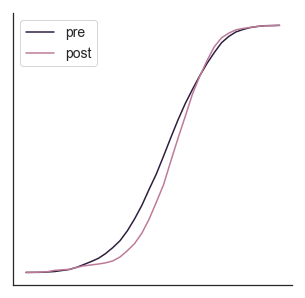

<Figure size 504x504 with 0 Axes>

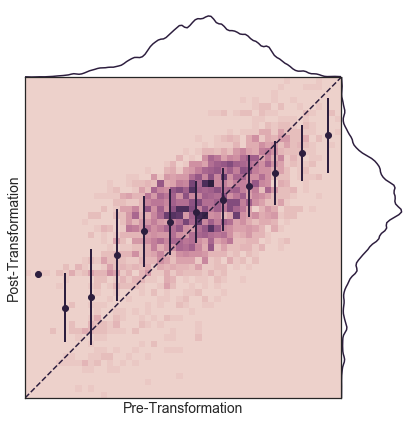

In [17]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

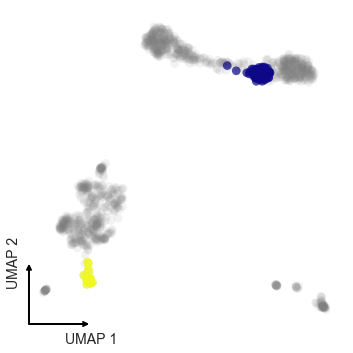

In [18]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_UMAP.plot_barcodes(ranks=['8','4']) 

In [19]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform='arcsinh'), post=retina_UMAP.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'] = corr_stats[0], EMD, KLD

R: 0.3417
EMD: 0.0903
KLD: 0.0462
CPU times: user 54.1 ms, sys: 9.81 ms, total: 63.9 ms
Wall time: 45.4 ms


CPU times: user 17.9 s, sys: 412 ms, total: 18.3 s
Wall time: 17.7 s


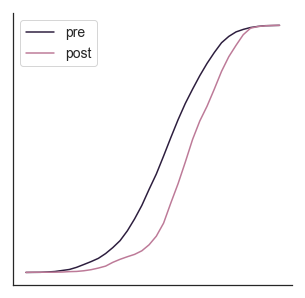

<Figure size 504x504 with 0 Axes>

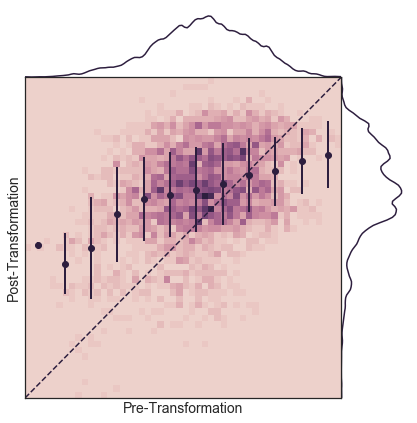

In [20]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

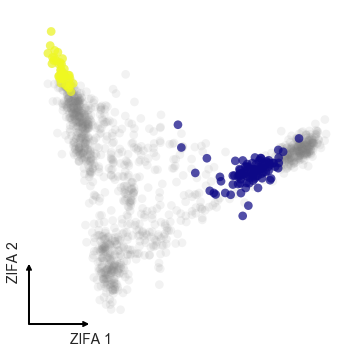

In [21]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_ZIFA.plot_barcodes(ranks=['8','4']) # rods & cones

In [22]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform='log2'), post=retina_ZIFA.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'] = corr_stats[0], EMD, KLD

R: 0.3171
EMD: 0.2442
KLD: 0.0825
CPU times: user 35.2 ms, sys: 8.38 ms, total: 43.6 ms
Wall time: 24.4 ms


CPU times: user 17.6 s, sys: 393 ms, total: 18 s
Wall time: 17.4 s


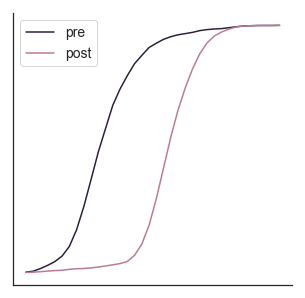

<Figure size 504x504 with 0 Axes>

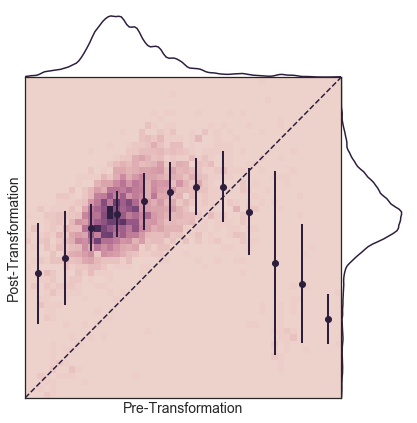

In [23]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

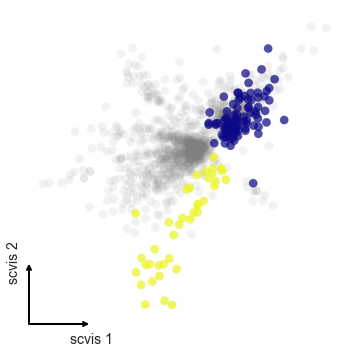

In [24]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/retina_clu.csv')
retina_scvis.plot_barcodes(ranks=['8','4']) # rods & cones

In [25]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform=None), post=retina_scvis.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'] = corr_stats[0], EMD, KLD

R: 0.8472
EMD: 0.1563
KLD: 0.0898
CPU times: user 25.2 ms, sys: 18.2 ms, total: 43.4 ms
Wall time: 23.5 ms


../fcc_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:165: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 18.2 s, sys: 450 ms, total: 18.6 s
Wall time: 18 s


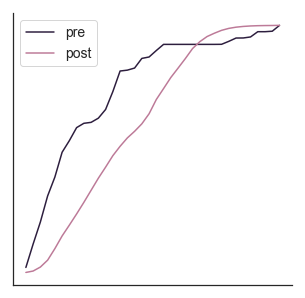

<Figure size 504x504 with 0 Axes>

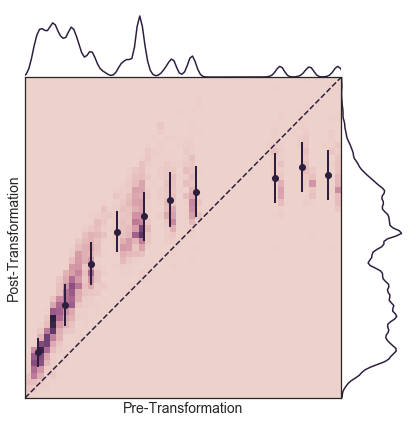

In [26]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

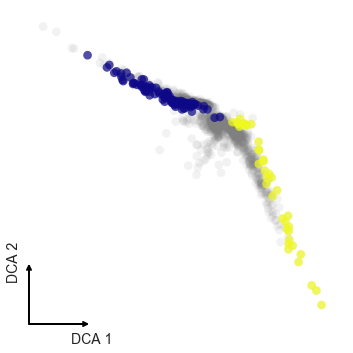

In [27]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_DCA.plot_barcodes(ranks=['8','4']) # rods & cones

In [28]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform=None), post=retina_DCA.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'] = corr_stats[0], EMD, KLD

R: 0.8686
EMD: 0.1514
KLD: 0.1001
CPU times: user 14.4 ms, sys: 2.65 ms, total: 17.1 ms
Wall time: 12.2 ms


CPU times: user 17.8 s, sys: 423 ms, total: 18.3 s
Wall time: 17.7 s


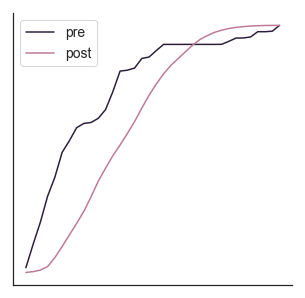

<Figure size 504x504 with 0 Axes>

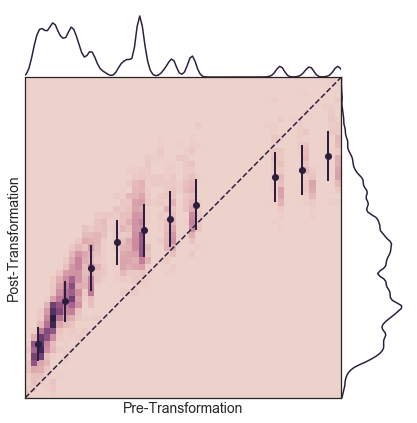

In [29]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

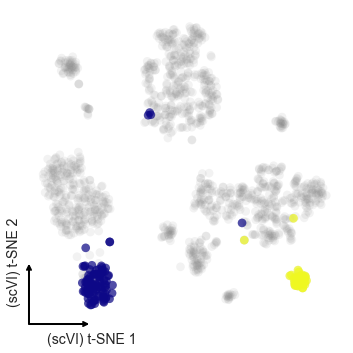

In [30]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['8','4'])

In [31]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform=None), post=retina_scVI.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'] = corr_stats[0], EMD, KLD

R: -0.251
EMD: 0.2599
KLD: 0.4768
CPU times: user 14.4 ms, sys: 3.01 ms, total: 17.4 ms
Wall time: 11.9 ms


CPU times: user 17.8 s, sys: 339 ms, total: 18.1 s
Wall time: 17.4 s


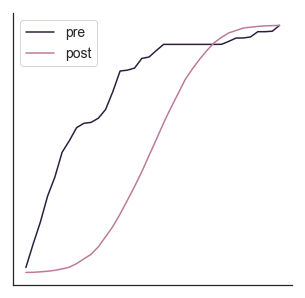

<Figure size 504x504 with 0 Axes>

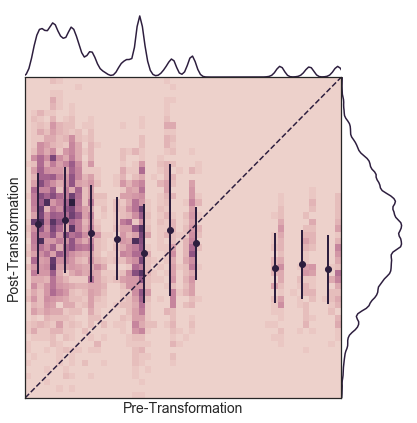

In [32]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

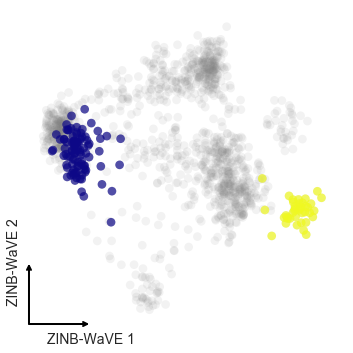

In [33]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['8','4']) 

In [43]:
retina_DCA.results

array([[  9.38080883, -17.68618011],
       [  8.8538084 , -16.24015236],
       [  8.37167358, -15.72172165],
       ...,
       [ -1.54329622,   2.13278556],
       [ -2.08355451,   2.37214231],
       [ -2.67297602,   2.25405312]])

In [34]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform=None), post=retina_ZINBWAVE.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINB-WaVE'], final_distance_stats['Retina']['EMD']['ZINB-WaVE'], final_distance_stats['Retina']['KLD']['ZINB-WaVE'] = corr_stats[0], EMD, KLD

R: 0.0543
EMD: 0.387
KLD: 0.3488
CPU times: user 15.8 ms, sys: 2.86 ms, total: 18.6 ms
Wall time: 11.8 ms


CPU times: user 17.9 s, sys: 385 ms, total: 18.3 s
Wall time: 17.6 s


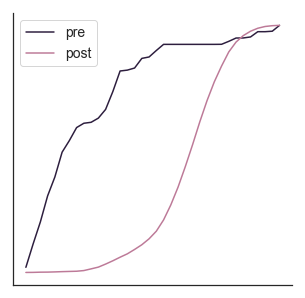

<Figure size 504x504 with 0 Axes>

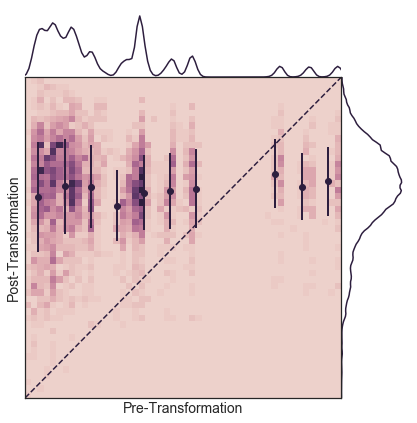

In [35]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

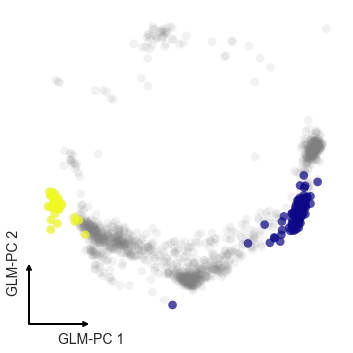

In [36]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv', name='GLM-PC', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_GLMPCA.plot_barcodes(ranks=['8','4']) 

In [37]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform=None), post=retina_GLMPCA.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLM-PCA'], final_distance_stats['Retina']['EMD']['GLM-PCA'], final_distance_stats['Retina']['KLD']['GLM-PCA'] = corr_stats[0], EMD, KLD

R: 0.0291
EMD: 0.5286
KLD: 0.3443
CPU times: user 13.7 ms, sys: 2.54 ms, total: 16.3 ms
Wall time: 19.3 ms


CPU times: user 17.5 s, sys: 335 ms, total: 17.8 s
Wall time: 17.1 s


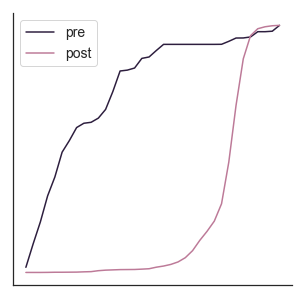

<Figure size 504x504 with 0 Axes>

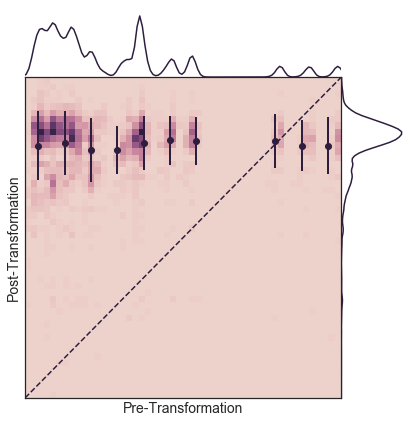

In [38]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

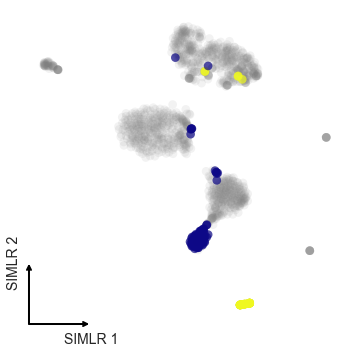

In [39]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_SIMLR.plot_barcodes(ranks=['8','4'])

In [40]:
%%time 
pre_flat_norm, post_flat_norm, corr_stats, EMD, KLD = distance_stats(pre=retina.barcode_distance_matrix(ranks=['8','4'], transform='arcsinh'), post=retina_SIMLR.barcode_distance_matrix(ranks=['8','4']))
print('R: {}\nEMD: {}\nKLD: {}'.format(round(corr_stats[0],4), round(EMD,4), round(KLD,4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'] = corr_stats[0], EMD, KLD

R: -0.2057
EMD: 0.1954
KLD: 0.1397
CPU times: user 42.1 ms, sys: 6.99 ms, total: 49 ms
Wall time: 37.4 ms


CPU times: user 17.7 s, sys: 340 ms, total: 18 s
Wall time: 17.3 s


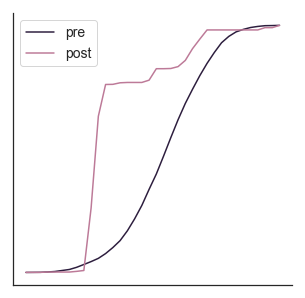

<Figure size 504x504 with 0 Axes>

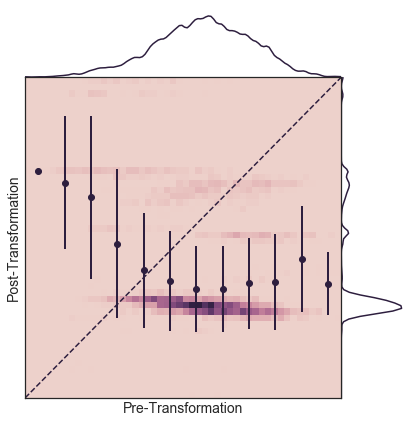

In [41]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/ganglia_cones_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)